# Project 3 : Cricket Match Score Analysis

Analyze cricket match scores and player performance.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Sample cricket match data
data = {
    'Player': ['Rohit Sharma', 'Virat Kohli', 'KL Rahul', 'Shreyas Iyer', 'Rishabh Pant', 'Hardik Pandya', 'Ravindra Jadeja', 'Jasprit Bumrah', 'Mohammed Shami', 'Bhuvneshwar Kumar', 'Yuzvendra Chahal'],
    'Runs': [50, 30, 45, 25, 10, 15, 5, 0, 0, 0, 0],
    'Wickets': [0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1],
    'Balls Faced': [40, 35, 50, 20, 12, 10, 5, 0, 0, 0, 0],
    'Balls Bowled': [0, 0, 0, 0, 0, 10, 24, 20, 20, 20, 24]
}

In [8]:
match_data = pd.DataFrame(data)

In [9]:
# Calculate team total runs
total_runs = match_data['Runs'].sum()
print('Total Runs : ',total_runs)

Total Runs :  180


In [10]:
# Calculate batting average for each player

match_data['Balls Average'] = match_data['Runs'] /  (match_data['Balls Faced'] - match_data['Runs'])
print("\nBatting Averages : \n",match_data[['Player','Balls Average']])


Batting Averages : 
                Player  Balls Average
0        Rohit Sharma           -5.0
1         Virat Kohli            6.0
2            KL Rahul            9.0
3        Shreyas Iyer           -5.0
4        Rishabh Pant            5.0
5       Hardik Pandya           -3.0
6     Ravindra Jadeja            inf
7      Jasprit Bumrah            NaN
8      Mohammed Shami            NaN
9   Bhuvneshwar Kumar            NaN
10   Yuzvendra Chahal            NaN


In [32]:
# Step 1: Create a DataFrame
match_data = pd.DataFrame({
  'Player': ['Virat Kohli', 'Rohit Sharma', 'KL Rahul', 'Shreyas Iyer', 'Hardik Pandya',
              'Ravindra Jadeja', 'Jasprit Bumrah', 'Mohammed Shami', 'Yuzvendra Chahal', 'Shikhar Dhawan', 'Rishabh Pant'],
  'Runs': [85, 70, 45, 30, 60, 25, 10, 15, 5, 55, 40],
  'Balls Faced': [60, 50, 40, 35, 30, 20, 15, 10, 8, 45, 30],
  'Wickets': [0, 0, 0, 0, 1, 2, 3, 2, 4, 0, 0],
  'Balls Bowled': [0, 0, 0, 0, 12, 24, 30, 24, 30, 0, 0],
  'Fours': [10, 8, 6, 3, 5, 2, 1, 1, 0, 7, 4],
  'Sixes': [2, 3, 1, 0, 3, 1, 0, 0, 0, 1, 2],
  'Overs Bowled': [0, 0, 0, 0, 2, 4, 5, 4, 5, 0, 0],
  'Runs Conceded': [0, 0, 0, 0, 15, 25, 20, 18, 30, 0, 0]
})

In [33]:
# Step 2: Calculate team total runs
team_total_runs = match_data['Runs'].sum()

In [34]:
# Step 3: Calculate batting averages
match_data['Batting Average'] = match_data['Runs'] / match_data['Balls Faced']

In [35]:
# Step 4: Calculate bowling strike rates
match_data['Bowling Strike Rate'] = match_data.apply(
        lambda row: (row['Balls Bowled'] / row['Wickets']) if row['Wickets'] > 0 else None, axis=1
)

In [36]:
# Step 5: Calculate economy rates
match_data['Economy Rate'] = match_data.apply(
        lambda row: (row['Runs Conceded'] / row['Overs Bowled']) if row['Overs Bowled'] > 0 else None, axis=1
)

In [37]:
# Step 6: Identify top run-scorer and wicket-taker
top_run_scorer = match_data.loc[match_data['Runs'].idxmax(), 'Player']
top_wicket_taker = match_data.loc[match_data['Wickets'].idxmax(), 'Player']

In [38]:
# Step 7: Implement a simple points system
match_data['Points'] = match_data['Runs'] + (match_data['Wickets'] * 10) + (match_data['Fours'] * 2) + (match_data['Sixes'] * 3)
match_data = match_data.sort_values(by='Points', ascending=False)


<ipython-input-39-5e39d7a72583>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Runs', data=match_data, palette='viridis')


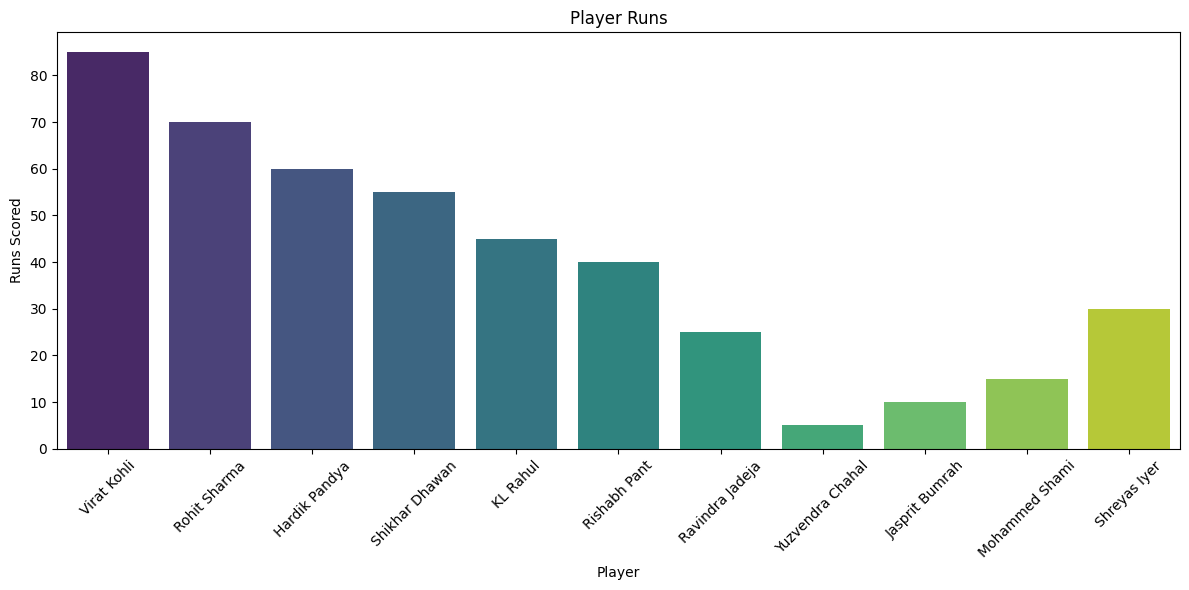

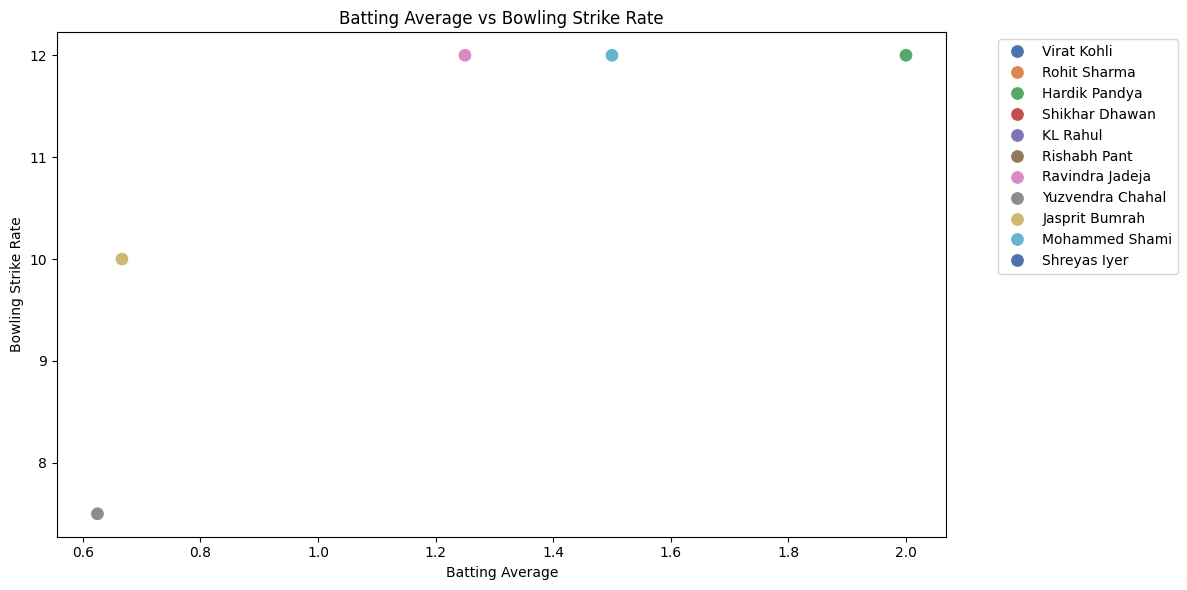

<ipython-input-39-5e39d7a72583>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Points', data=match_data, palette='coolwarm')


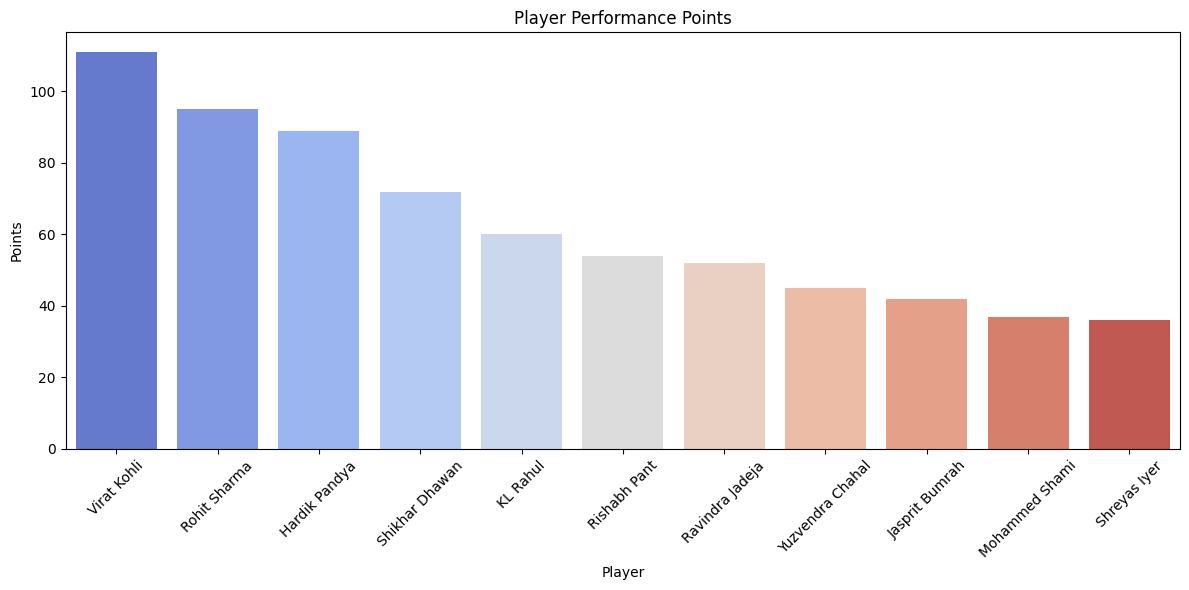

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Runs', data=match_data, palette='viridis')
plt.title('Player Runs')
plt.ylabel('Runs Scored')
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Batting Average', y='Bowling Strike Rate', hue='Player', data=match_data, palette='deep', s=100)
plt.title('Batting Average vs Bowling Strike Rate')
plt.ylabel('Bowling Strike Rate')
plt.xlabel('Batting Average')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Points', data=match_data, palette='coolwarm')
plt.title('Player Performance Points')
plt.ylabel('Points')
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Step 9: Calculate Net Run Rate (NRR)
total_overs_faced = match_data['Balls Faced'].sum() / 6
total_runs_conceded = match_data['Runs Conceded'].sum()
total_overs_bowled = match_data['Overs Bowled'].sum()
net_run_rate = (team_total_runs / total_overs_faced) - (total_runs_conceded / total_overs_bowled)

In [41]:
# Print results
print("Cricket Match Data:")
print(match_data)
print(f"\nTeam Total Runs: {team_total_runs}")
print(f"Top Run-Scorer: {top_run_scorer}")
print(f"Top Wicket-Taker: {top_wicket_taker}")
print(f"Net Run Rate (NRR): {net_run_rate:.2f}")

Cricket Match Data:
              Player  Runs  Balls Faced  Wickets  Balls Bowled  Fours  Sixes  \
0        Virat Kohli    85           60        0             0     10      2   
1       Rohit Sharma    70           50        0             0      8      3   
4      Hardik Pandya    60           30        1            12      5      3   
9     Shikhar Dhawan    55           45        0             0      7      1   
2           KL Rahul    45           40        0             0      6      1   
10      Rishabh Pant    40           30        0             0      4      2   
5    Ravindra Jadeja    25           20        2            24      2      1   
8   Yuzvendra Chahal     5            8        4            30      0      0   
6     Jasprit Bumrah    10           15        3            30      1      0   
7     Mohammed Shami    15           10        2            24      1      0   
3       Shreyas Iyer    30           35        0             0      3      0   

    Overs Bowled  R